https://pypi.org/project/mtcnn/  

http://dlib.net/  
http://dlib.net/face_detector.py.html  
http://dlib.net/face_landmark_detection.py.html

In [1]:
import os
import numpy as np
import cv2
from mtcnn.mtcnn import MTCNN
import dlib
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
def read_img(filepath, mode="RGB"):
    """
    Function to read image from file and convert it to RGB by default, or leaves BGR.
    Input: file path.
    Output: image as numpy array.
    """
    img = cv2.imread(filepath)
    if mode == "RGB":
        # Convert to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [3]:
def detect_faces(image, detector="mtcnn"):
    """
    Returns an array of bounding boxes of each face detected in provided image.
    Input: image in RGB mode as numpy array.
    Param detector: face detection model - hog (default) or mtcnn.
    Output: List of tuples with detected face coordinates - top, bottom, left, right.
            Coordinates are in right order to extract roi from image.
    """
    img_boundaries = image.shape
    if detector == "hog":
        detections = hog_detector(image)
        # Use max/min function and img_boundaries to make sure coordinates are within image boundaries.
        faces = [(max(face.top(), 0), min(face.bottom(), img_boundaries[0]), max(
            face.left(), 0), min(face.right(), img_boundaries[1])) for face in detections]
        return faces
    elif detector == "mtcnn":
        faces = []
        detections = mtcnn_detector.detect_faces(image)
        for d in detections:
            # You can adjust detection confidence according your needs.
            if d["confidence"] > 0.9:
                face = max(d["box"][1], 0), min(d["box"][1] + d["box"][3], img_boundaries[0]
                                                ), max(d["box"][0], 0), min(d["box"][0] + d["box"][2], img_boundaries[1])
                faces.append(face)
        return faces
    else:
        return list()

In [4]:
def get_roi(image, coordinates):
    """
    Function to extract region of interest (roi) from image using coordinates.
    Input image: image as numpy array to extract from.
    Input coordinates: coordinates of roi in form of tuple (top, bottom, left, right)
    """
    roi = image[coordinates[0]:coordinates[1], coordinates[2]:coordinates[3]]
    return roi

In [5]:
# Load MTCNN face detector.
mtcnn_detector = MTCNN()
# Load HOG face detector.
hog_detector = dlib.get_frontal_face_detector()

## Extract and show faces from single image.

In [13]:
img_path = "./examples/workplace.jpg"
img = read_img(img_path)

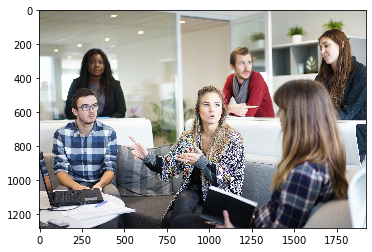

In [15]:
plt.imshow(img)

In [14]:
faces = detect_faces(img, "hog")
faces

[(510, 659, 941, 1090),
 (510, 659, 228, 377),
 (284, 388, 1160, 1264),
 (273, 377, 284, 388),
 (176, 300, 1613, 1738)]

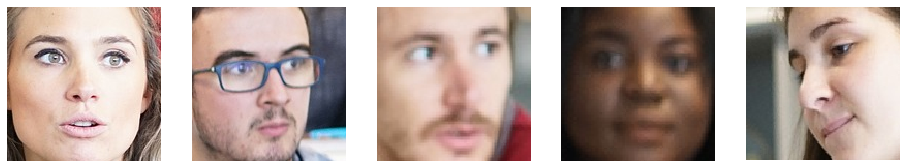

In [15]:
plt.figure(figsize=(16, 10))
n_cols = 5
n_rows = np.ceil(len(faces) / n_cols)

n = 1
for face in faces:
    # Setup subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, n)
    sp.axis('Off') # Don't show axes (or gridlines)
    plt.imshow(get_roi(img, face))
    n += 1

plt.show()

## Extract and store faces from all images in source directory.

In [8]:
# Path to source directory.
source_dir = "./examples"
# List of acceptable image extensions
img_extensions = ["jpg", "jpeg"]

In [6]:
# Extract all detected faces from images in source directory and store in directory faces.
def extract_faces(source_dir):
    # Create target directory where to save extracted faces.
    target_dir = os.path.join(source_dir, "faces")
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for filename in os.listdir(source_dir):
        if filename.lower().split(".")[-1] in img_extensions:
            img_path = os.path.join(source_dir, filename)
            
            img = read_img(img_path, "BGR")
            
            faces = detect_faces(img, "hog")
            
            n = 1
            for face in faces:
                roi = get_roi(img, face)
                
                face_file = target_dir + "/" + "".join(filename.split(".")[:-1]) + "_" + str(n) + ".jpg"
                
                cv2.imwrite(face_file, roi)
                
                n += 1

In [9]:
extract_faces(source_dir)